## change basic

In [13]:
import numpy as np
def createWordFrame():
    return np.eye(3),np.zeros(3)
def createRandomFrame(seed=0):
    '''
    (u,v,w),三个单位为1 的正交向量
    '''
    np.random.seed(seed)
    orgin=np.random.randn(3)
    u=np.random.randn(3)
    u=u/np.linalg.norm(u)
    #默认的
    y=np.array([0,1,0])
    w=np.cross(u,y)
    w=w/np.linalg.norm(w)
    v=np.cross(w,u)
    v=v/np.linalg.norm(v)
    return np.array([u,v,w]).T,orgin
def check(U):
    d=U.T.dot(U)
    print(d)
def getPoint(F,orgin,c):
    return F.dot(c)+orgin
def convertCoordinate(F1,Origin1,F2,Origin2,c1):
    '''
    F1=(u1,u2,u3,p)
    F2=(v1,v2,v3,q)
    c1是以F1为basic的点
    
    求以F2为basic的坐标c2
    '''
    
    x=F1.dot(c1)+Origin1
    
    c2=np.linalg.inv(F2[:3,:3]).dot(x-Origin2)
    return c2

In [14]:
# I,P=createWordFrame()
I,P=createRandomFrame(3)
coordinate=[9,22,21]
x=getPoint(I,P,coordinate)
print(x)
Ia,Pa=createRandomFrame()
c2=convertCoordinate(I,P,Ia,Pa,coordinate)
x=getPoint(Ia,Pa,c2)
print(x)

[ -6.15924642  20.90280695 -22.79371808]
[ -6.15924642  20.90280695 -22.79371808]


## 学习一个转换，把3一个三角形转成另外一个三角形

In [99]:
from matplotlib import pyplot as plt
% matplotlib inline

def showPolygon(x,pad=0.2):
    plt.figure()
    poly=plt.Polygon(x)
    plt.gca().add_patch(poly)

    xmin,xmax=np.min(x[:,0]),np.max(x[:,0])
    ymin,ymax=np.min(x[:,1]),np.max(x[:,1])
    plt.xlim([xmin-pad,xmax+pad])
    plt.ylim([ymin-pad,ymax+pad])
    plt.axis('equal')

In [102]:
triA=[(0.5,0.5),(5,5),(5,-5),(0.5,-0.5)]
triB=[(-1,1),(1,1),(1,-1),(-1,-1)]
def trans(A,B):
    '''
    A---->B
    A,B  都是3个点的list
    学习一个矩阵，B=M(A)
    '''
    assert len(A)==3
    assert len(B)==3
    
    
    xA=np.array([x[0] for x in A])
    yA=np.array([x[1] for x in A])
    
    M=np.ones((len(A),len(A)))
    M[:,0]=xA
    M[:,1]=yA
    
    
    xb=np.array([x[0] for x in B])
    yb=np.array([x[1] for x in B])
    
    toXb=np.linalg.solve(M,xb)
    toYb=np.linalg.solve(M,yb)
    
    R=np.zeros((len(A),len(A)))
    R[0,:]=toXb
    R[1,:]=toYb
    R[-1,-1]=1
    return R
def tohomegenious(x):
    r=np.ones((x.shape[0]+1,x.shape[1]))
    r[:-1,:]=x
    return r

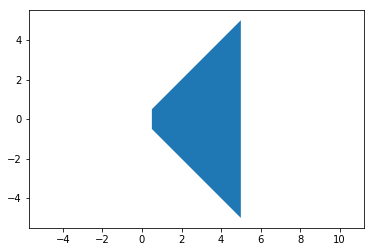

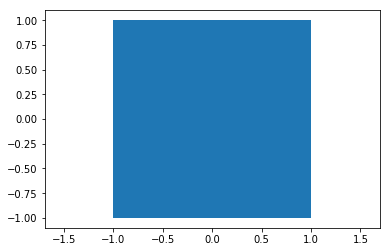

In [103]:
A=np.array(triA)
showPolygon(A)
B=np.array(triB)
showPolygon(B)

In [ ]:
tr